In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
 Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
single_image=x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

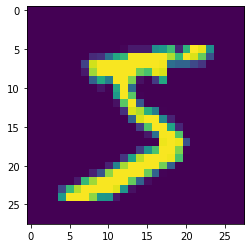

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_example=to_categorical(y_train)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [ ]:
single_image.max()

255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
scaled_single=x_train[0]

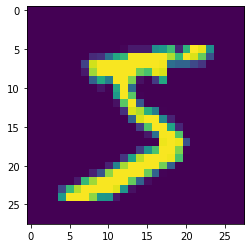

In [ ]:
plt.imshow(scaled_single)

In [ ]:
x_train=x_train.reshape(60000,28,28,1)

In [ ]:
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6993 - accuracy: 0.7936 - val_loss: 0.3390 - val_accuracy: 0.9007
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3053 - accuracy: 0.9093 - val_loss: 0.2509 - val_accuracy: 0.9235
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2365 - accuracy: 0.9297 - val_loss: 0.2034 - val_accuracy: 0.9378
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1901 - accuracy: 0.9428 - val_loss: 0.1694 - val_accuracy: 0.9496
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1590 - accuracy: 0.9530 - val_loss: 0.1412 - val_accuracy: 0.9573
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1382 - accuracy: 0.9586 - val_loss: 0.1365 - val_accuracy: 0.9603
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1228 - accuracy: 0.9634 - val_loss: 0.1194 -

In [ ]:
losses[['accuracy','val_accuracy']].plot()

NameError: ignored

In [ ]:
print(model.metrics_names)

['loss', 'accuracy']


In [ ]:
print(model.evaluate(x_test,y_cat_test,verbose=0))

[0.09866800904273987, 0.9704999923706055]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

7

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.98      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
my_num=x_test[0]

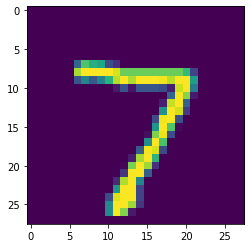

In [ ]:
plt.imshow(my_num.reshape(28,28))

In [ ]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([7])